---
Analisis de clasificación sobre un conjunto de datos de banco "Thera Bank" cuya administración desea explorar formas de convertir a sus clientes pasivos en clientes de préstamos personales y retenerlos como clientes y que tengan sus depositos en el banco. 
---

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns # Importamos librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('Bank_Personal_Loan.csv')
df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0


In [11]:
# Elimino columna que no me sirve para el analisis
df = df.drop(columns=['ZIP Code'])

ID: customer Id

Age:customer's age in completed years

Experience:years of professional experience

Income<:Annual income of the customer

ZIP Code:Address Zip code

Family:family size of customer

CCAvg:Avg. spending on credit card per month
due to all other parameter is annually so i converted it for per year

Education :Educational level ( undergraduate= 1 , graduate=2 , advance=3)

Education :Educational level ( undergraduate= 1 , graduate=2 , advance=3)

Personal Loan: Did this customer accept the personal loan offered in the last campaign?

Securities Account:Does the customer have a securities account with the bank?

CD Account:Does the customer have a certificate of deposit(CD) account with the bank?

Online:Does the customer use internet banking facilities

CreditCard: Does the customer use a credit card issued by universalBank?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   Family              5000 non-null   int64 
 5   CCAvg               5000 non-null   object
 6   Education           5000 non-null   int64 
 7   Mortgage            5000 non-null   int64 
 8   Personal Loan       5000 non-null   int64 
 9   Securities Account  5000 non-null   int64 
 10  CD Account          5000 non-null   int64 
 11  Online              5000 non-null   int64 
 12  CreditCard          5000 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 507.9+ KB


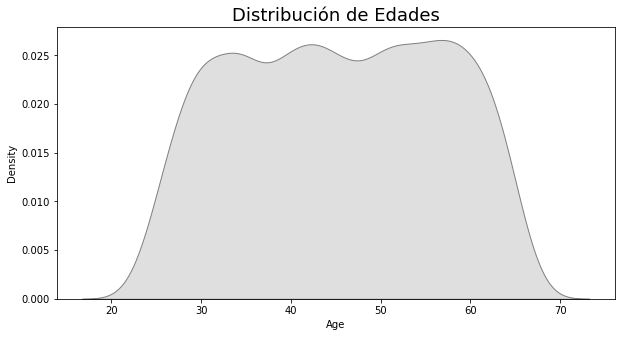

In [13]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Age'], color='gray', fill=True)
plt.title('Distribución de Edades', fontsize=18)
plt.grid(False)
plt.show()

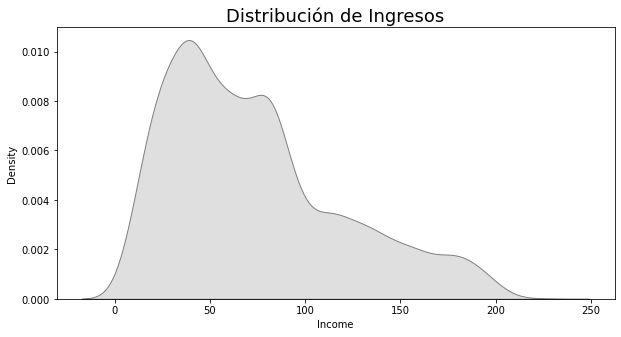

In [14]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Income'], color='gray', fill=True)
plt.title('Distribución de Ingresos', fontsize=18)
plt.grid(False)
plt.show()

In [15]:
df.describe()

,ID,Age,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [16]:
df.corr()

,ID,Age,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,-0.016797,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.046418,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.052563,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.157501,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.016797,-0.046418,-0.052563,-0.157501,1.000000,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
Education,0.021463,0.041334,0.013152,-0.187524,0.064929,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,-0.020445,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.061367,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.019994,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,-0.006909,0.008043,0.010353,0.169738,0.014110,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


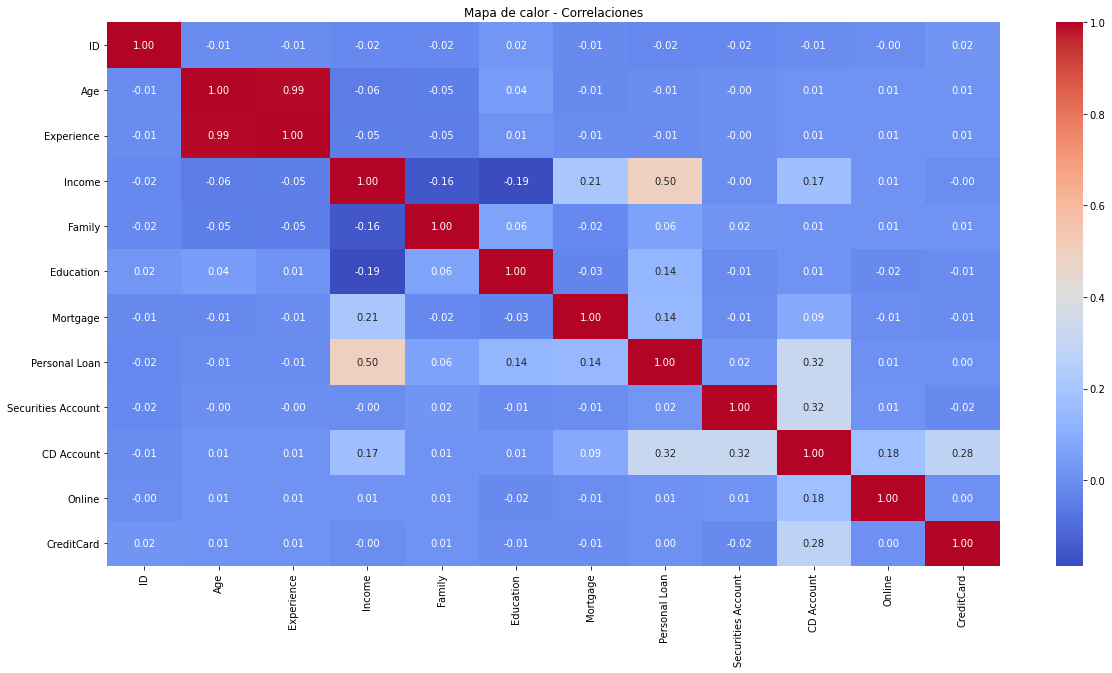

In [18]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de calor - Correlaciones')
plt.show()